## 정규화

최적화 과정에서 최적해를 잘 찾도록 정보를 추가하는 것으로 성능 개선하는 방법들을 포괄하는 것으로 모델이 크고 복잡하게 되면 파라미터 공간이 커지게 되고 그로 인해 학습 데이터가 많이 필요합니다. 이때, 정규화 기법을 쓰지 않으면 과적합이 되기에 적절하게 잘 사용해야합니다.

1. 최적해가 어느 공간에 있는지 알려줌

2. 손실함수를 부드럽게하여 최적해로 가는 길을 닦아줌

3. 최적해 주변을 평평하게하여 새로운 데이터가 들어와도 성능 좋게 하도록 만들어 준다.

4. 모델과 데이터에 확률적 성질 부여를 통해서 조금씩 다르지만 다양한 상황에 학습이 가능하도록 도와줌


### 일반화 오류

일반화는 모델 성능이 좋다는 의미로 훈련 데이터가아닌 새로운 데이터에 대해 모델 예측이 얼마나 잘되는지를 가리킵니다. 일반화의 오류는 모델의 훈련 성능과 검증/테스트 성능의 차를 말하는 것으로 당연히 오차가 적을 수록 일반화가 잘된 모델이다. 물론, 검증/테스트 성능은 훈련 성능보다 낮을 수 밖에 없지만, 두 성능의 차이가 작아야 과적합되지 않고 새로운 데이터도 잘 처리하는 모델이 만들어집니다. 그래서 정규화는 일반화를 잘하는 모델을 만드는 기법이라고 합니다. 

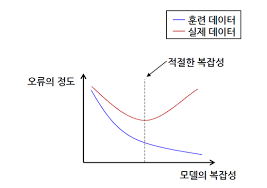

### 정규화 접근 방식

1, 모델을 최대한 단순하게 만든다

   - 모델이 복잡할 수록 당연히 과적합이 잘 생기기 때문이다.

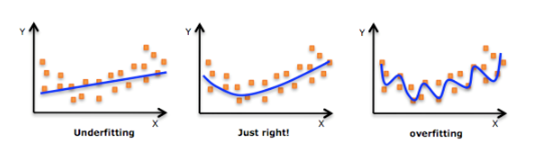

2. 사전 지식을 표현해서 최적해를 빠르게 찾도록 한다.

   - 모델 사전 분포를 이용해서 찾기
   
   - 사전 지식: 전이 학습, 메타학습같이 파라미터 초기화하여 세부 튜닝하는 학습방법
   
 3. 확률적 성질 추가(= 데이어테 랜덤성 추가)
 
    - 데이터,모델, 훈련기법 등에 추가하면 조금씩 변형된 형태가 되어서 이러한 것들을 처리하면 다양한 상황에서 학습을 할 수 있는 효과를 준다.
    
    - 손실함수는 풍부한 데이터를 이용하게 되니 넓은 범위에서 세밀하게 표현이 가능하니까 정확한 해를 찾을 수 있고 모델 노이즈에 민감하게 반응을 하지 않게 된다
    
    
 4. 여러 가설을 고려하여 예측한다.
 
    - 하나의 모델을 예측하지 않고 여러 모델로 동시에 예측하여 결과에 따른 최종 예측하는 방식
    
    - 여러 모델예측으로 인해 편향성을 제거하고 오차를 최소화하여 공정하게 예측가능
    

## 배치 정규화

신경망 학습이 어려운 이유는 계층을 지날 때마다 데이터가 조금씩 왜곡이 되는 현상이 벌어지기 때문입니다. 그래서 가중치 초기화를 잘하고 학습률을 작게 사용해야 데이터 왜곡을 막을 수 있는데 그렇게 되면 학습 속도가 느려지는 문제가 생깁니다. 정말 어렵지만 데이터 왜곡은 해결해야하는 문제입니다.

### 내부 공변량 변화

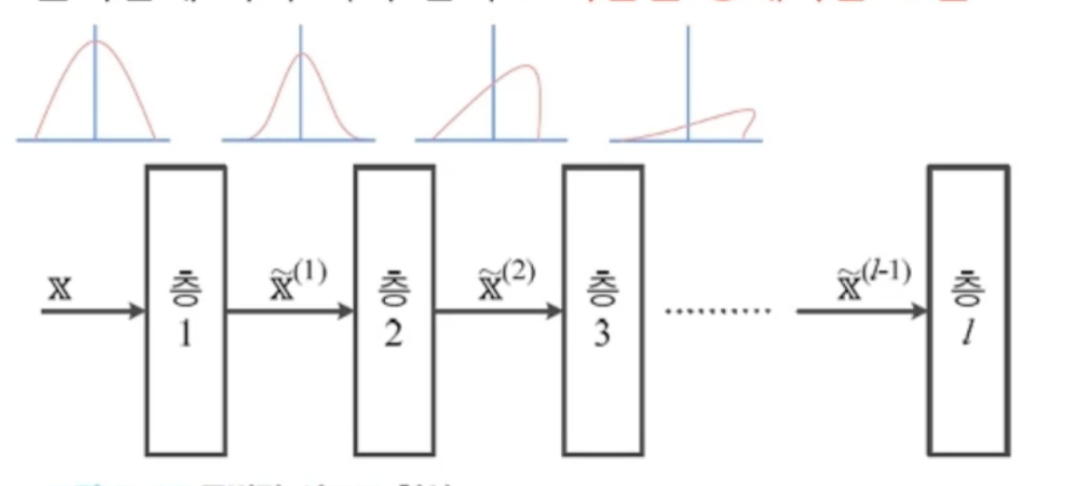

내부 공변량변화는 데이터 분포가 보이지 않은 요인(= 내부 공변량)이 바뀜으로 인해서 가중치 값이 바뀌고 그로 인해 데이터 왜곡이 되어버리는 현상을 뜻하고, 그로 인해 각 계층의 분포가 원래 분포보다 멀리 떨어지게 됩니다. 그래서, 하위 계층의 작은 변화가 상위계층까지 영향을 미치게 됩니다. 즉,  학습 과정에서 각 층 별로 입력 데이터 분포가 달라지는 현상입니다.

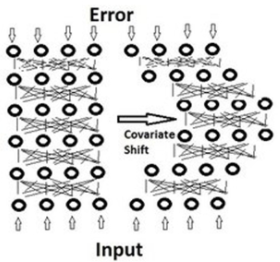

### 배치 정규화 단계

배치 정규화는 데이터가 계층을 지날 때마다 매번 정규화해서 내부 공변량 변화를 없애는 방법으로 기존 정규화와 다르게 모델을 한꺼번에 하지 않고 계층형 형태로 실행하여 매번 데이터별로 정규화가 일어나기에 데이터 왜곡을 방지하죠. 

#### 표준 가우시안 분포로 정규화

d차원의 입력데이가 들어오면 배치 정규화로 차원별 평균과 분산을 구한 후에 가우시안 분포 N(O,1)로 정규화하는 방식으로 데이터가 작아지면 내부 공변량의 변화도 작게 만들 수 있습니다.

수식: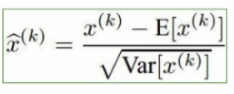

배치 정규화를 모든 계층에 적용하면 데이터가 지날 때마다 표준 가우시안 분포로 바뀌고 그에 따라 내부 공변량의 변화를 최소화하여 오차의 크기가 줄어들뿐만 아니라 누적 오차도 작게 한다.

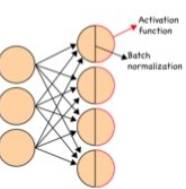

#### 원래 분포로 복구

데이터를 가우시안 분포로 정규화하면 모델이 표현하고 싶은 비선형성을 제대로 파악을 할 수 없게 됩니다. 예를 들어, 활성함수가 시그모이드인 경우 정규화된 데이터는 시그모이드의 가운데 부분인 선형 영역을 통과하게 되어 비선형성이 사라지게 된다. 하나 더 예시를 들자면, ReLU일 경우 표준 가우시안 분포로 정규화된 데이터의 절반은 음수이고 절반은 양수가 되어 데이터 출력이 0이되게 되므로 뉴런의 절반이 죽어서 학습이 이뤄지지 않는다. 이러한 이유들 때문에 배치 정규화 후에 모델의 비선형성을 살리기 위해서는 데이터를 표준 가우시안 분포로 정규화를 한 후에 원래 데이터로 복구 해야한다. 데이터를 복구할 때는 평균과 표준펴차는 모델의 학습과정에서 따로 구해야한다.

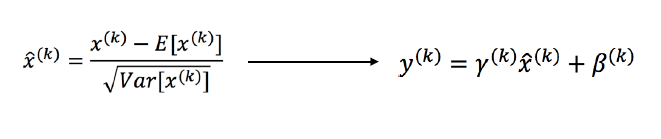


### 배치 정규화 알고리즘

배치 정규화의 알고리즘은 미니배치 평균과 분산을 구한 후 표준 가우시안 분포로 정규화를 진행합니다 그 후에 학습된 평균과 표준편차을 이용하여 원래 분포로 복구한다. 단계별로 다시 이야기를 하면, 학습 단계에서는 미니배치 단위의 평균과 분산으로 정규화를 수행하고 테스트 단계에서는 전체 데이터의 평균과 분산으로 정규화합니다.

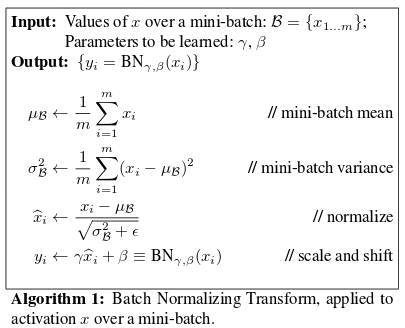


#### 배치 정규화 수행 위치

처음에는 뉴런의 가중 합산과 활성함수 사이에서 하는 것을 제안했으나 실제로 연구를 했을 땐 그리 효과를 주지 못했습니다. 그래서 활성함수 실행 후 배치 정규화를 하는 것이 더 성능이 좋습니다.

### 이미지 정규화 기법

배치 정규화를 이미지에 적용할 때 채널 단위로 정규화를 조금 더 세분화된 방식으로 사용합니다. RNN에서는 계층 정규화를 사용하는데 이 기법은 이미지 샘플별로 정규화 하는 방식으로 미니배치 크기와 무관한 특징을 갖고 있습니다. 스타일 변환이나 GAN에서는 인스턴스 정규화를 사용하고, 이는 샘플의 채널별로 정규화하는 것을 의미합니다. 만약 미니 배치 크기가 작을 경우는 샘플의 채널 그룹을 나눠서 정규화하는 방식인 그룹 정규화를 사용합니다.
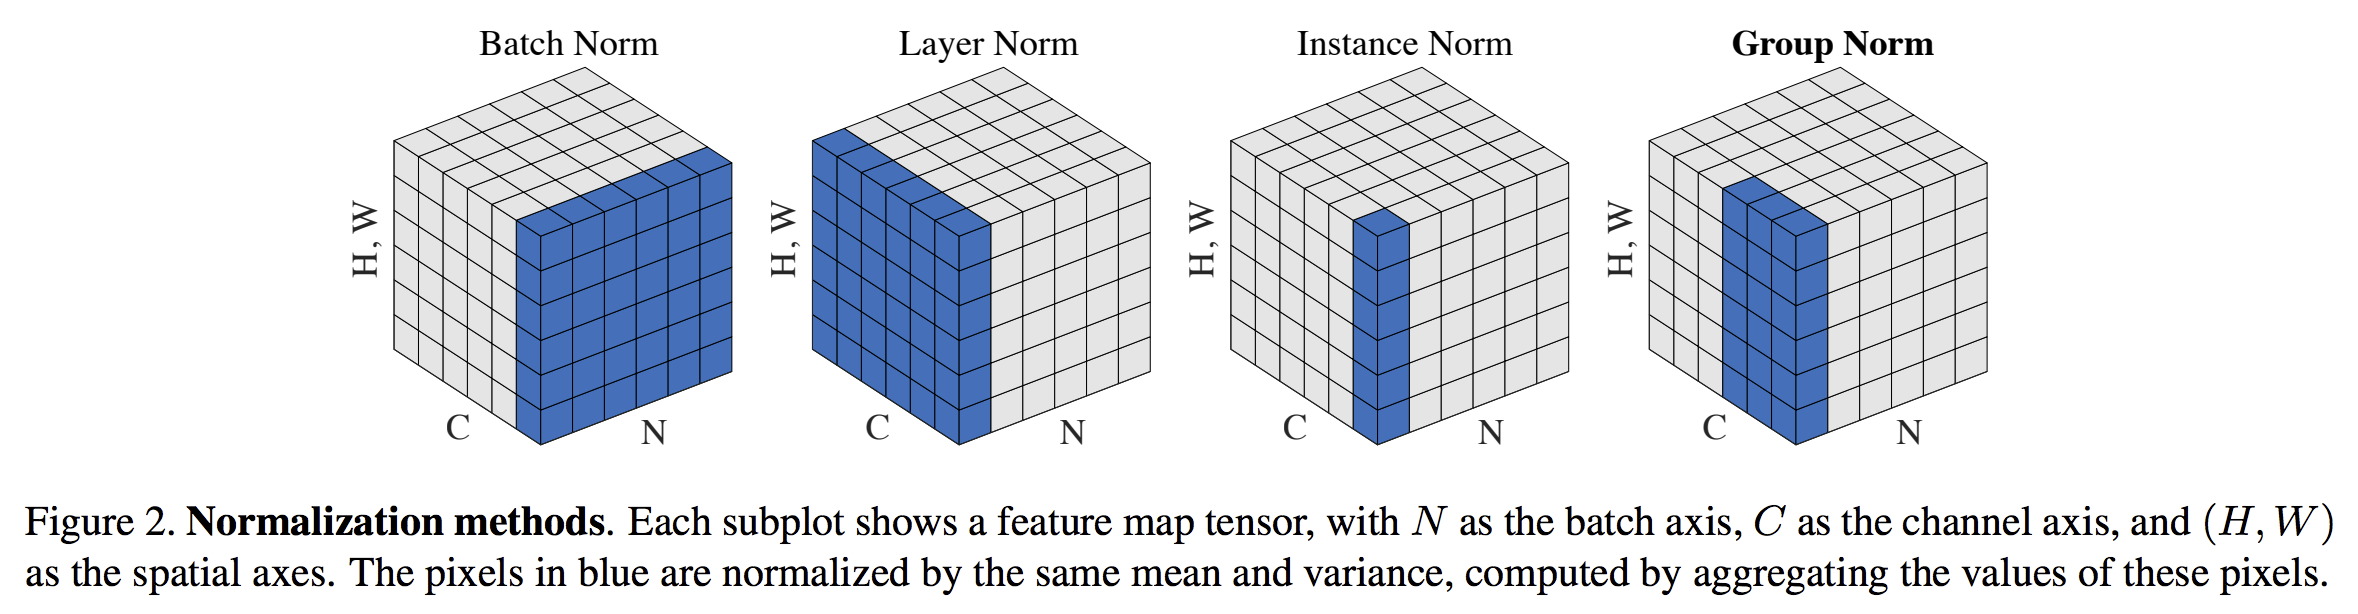


### 배치 정규화의 우수성

1. 내부 공변량 변화가 최소화가 되어서 그레이디언트의 흐름이 원활해져서 학습이 안정적으로 진행됨

2. 지속적으로 데이터 분포 유지로 인해서 초기화 방법에 대한 의존도가 감소되기에 높은 학습률 사용 가능

3. 미니배치 단위로 정규화하기 때문에 확률적 성질이 생겨서 데이터가 변화되고 그로 인해 모델 성능 향상

4. 손실과 그레이디언트 변화를 제약하여 곡면이 부드러워지고 이로 인해 모델의 학습 성능이 향상됨